In [13]:
%matplotlib inline  

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from data.get_svm_data import DataLoader
PATH = '../data/'
FEAT_PATH = PATH + 'baseline/'


In [2]:
db = DataLoader(PATH, FEAT_PATH)


Loading data...


Data loaded.


Audio (74720, 1582) (18686, 1582)
Visual (74720, 1271) (18686, 1271)
FC6 (74720, 4096) (18686, 4096)
Labels Valence (74720,) (18686,)
Labels Arousal (74720,) (18686,)


In [14]:
def fit_predict(X_train, X_val, y_train, y_val):
    tuned_parameters = {'n_estimators': [100, 50, 20], 'max_depth': [5, 10, 20]}
    clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=3,
                   scoring=["neg_mean_squared_error", "r2"],
                   refit="neg_mean_squared_error", n_jobs=22)
    clf.fit(X_train, y_train)
    print(clf.best_params_)
    p_train = clf.predict(X_train)
    p_val = clf.predict(X_val)
    return mean_squared_error(y_train, p_train), r2_score(y_train, p_train),\
           mean_squared_error(y_val, p_val), r2_score(y_val, p_val)


def process(feature='audio', target='valence'):
    if feature == 'audio':
        X_train = db.audio_x_train
        X_val = db.audio_x_val
    elif feature == 'visual':
        X_train = db.visual_x_train
        X_val = db.visual_x_val
    else:
        X_train = db.fc6_x_train
        X_val = db.fc6_x_val
    if target == 'valence':
        y_train = db.y_train_valence
        y_val = db.y_val_valence
    else:
        y_train = db.y_train_arousal
        y_val = db.y_val_arousal
    a, b, c, d = fit_predict(X_train, X_val, y_train, y_val)
    print(feature, target)
    print("MSE:", a, c)
    print("r2:", b, d)

In [15]:
process('visual', 'arousal')

{'max_depth': 10, 'n_estimators': 50}


visual arousal
MSE: 0.03949006475542156 0.11359428968232561
r2: 0.5594848528286738 -0.01904790955280955


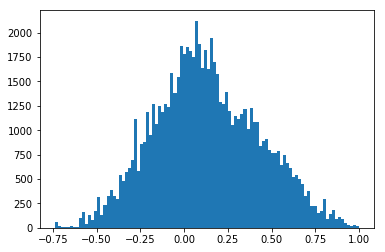

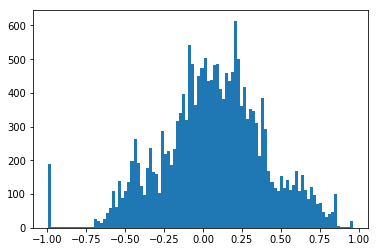

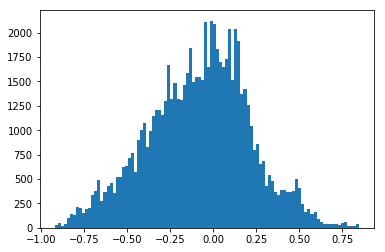

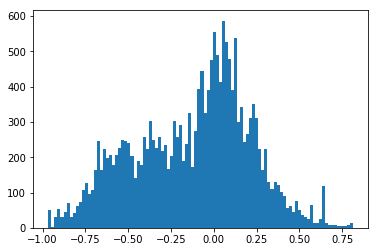

In [10]:
import matplotlib.pyplot as plt

plt.hist(db.y_train_arousal, 100)
plt.show()
plt.hist(db.y_val_arousal, 100)
plt.show()
plt.hist(db.y_train_valence, 100)
plt.show()
plt.hist(db.y_val_valence, 100)
plt.show()
